<a href="https://colab.research.google.com/github/cdcmx2020a/group_A_AlmaJair/blob/master/plot_pollutants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [ ]:
rcp['font.size'] = 18.
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'

In [ ]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

fatal: destination path 'group_A_AlmaJair' already exists and is not an empty directory.


In [ ]:
# Obtener casos diarios Tijuana
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/casos_diarios_mty.csv',delimiter=',') # Baja California is 2

In [ ]:
# Date of city
time = mat[0,:]
str(mat[0,0]) # dia , mes y año

'12012020.0'

In [ ]:
cases_ciudad = mat[1,:] # number of cases in city

In [ ]:
# Loads time mm,dd,yyyy HH,mm
time_final_ct = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final_ct[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final_ct[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                

In [ ]:
# https://en.climate-data.org/north-america/mexico/lower-california/tijuana-1005196/#temperature-graph
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_mty.csv', delimiter=',')

In [ ]:
temp_mean = temp_mat[:,3] # graba la variable temp mean que esta en la columna 4
temp_min = temp_mat[:,4] # graba la variable temp min que es columna 5
temp_max = temp_mat[:,5] # graba la variable temp max que es columna 6 (python empieza en 0)

In [ ]:
year = temp_mat[:,0] # columna 0 es el año
month = temp_mat[:,1] # columna 1 es el mes
day = temp_mat[:,2] # columna 2 es el dia
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii]))) # Lo convierte a formato Python en un loop renglon por renglon

No handles with labels found to put in legend.


Text(0, 0.5, 'Temperature $^oC$')

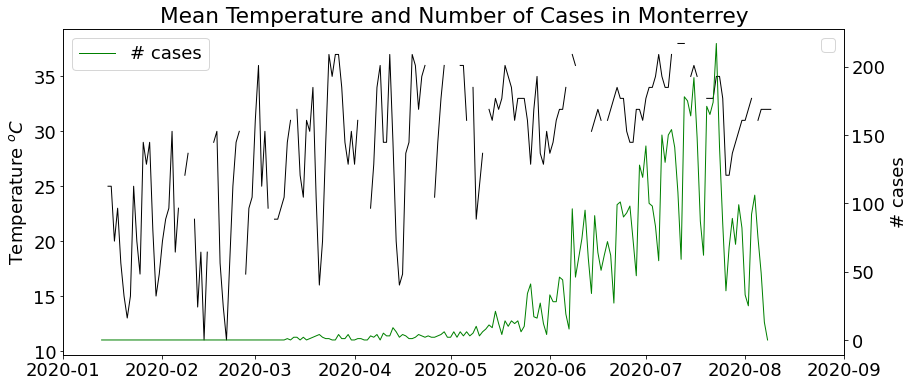

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Mean Temperature and Number of Cases in Monterrey'
ax1 = ax # eje de las y del lado izquiero se llama ax1
# label es para poner nombre a la linea que graficamos
# ax1.plot(num2date(time_final_temp), temp_mean, lw=1, color='m', label='temp')
# ax1.plot(num2date(time_final_temp), temp_min, lw=1, color='r')
ax1.plot(num2date(time_final_temp), temp_max, lw=1, color='k')
ax1.legend(loc=1) # pone el titulo de cada linea
ax2 = ax1.twinx() # eje de las y del lado derecho se llama ax2
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=1, color='g', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2) # pone el titulo de cada linea
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperature $^oC$')
# plt.savefig('Figura_Estado_Monterrey_temp.png', bbox_inches='tight')

In [ ]:
# Now plot the number of pollutants

In [ ]:
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/contaminantes_centro_2020.csv', delimiter=',') # Loads San Pedro pollutant file

In [ ]:
# Loads time mm,dd,yyyy HH,mm
month = mat[:, 1]
day = mat[:, 0]
year = mat[:, 2]
hour = mat[:, 3]
time = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time[ii] = date2num(datetime.datetime(np.int(year[ii] + 2000), np.int(month[ii]),
                         np.int(day[ii]), np.int(hour[ii])))

In [ ]:
# This depends on the file
o3 = np.ma.masked_invalid(mat[:, 4]) # 03 ppb 10 para Cadereyta 7 para cdmx y  5 para centro
pm25 = np.ma.masked_invalid(mat[:, 7]) # pm2.5 kg/m3 11 para Cadereyta 6 para cdmx y 7 para  centro
temp = np.ma.masked_invalid(mat[:, 8]) # temperature C 12 para Cadereyta 8 para cdmx y 8 para centro

In [ ]:
!less /content/group_A_AlmaJair/datos_covid/contaminantes_centro_2020.csv

#CE_2020,,,,,
#Local Datetime (mm,dd,yyyy HH,mm),O3 (ppb),PM10 (µg,m3),PM2.5 (µg,m3),Temperatu re
01,01,20,0,00,NaN,NaN,60.91,NaN,NaN
01,01,20,1,00,0.019,NaN,85.64,10.49,91
01,01,20,2,00,0.018,NaN,72.39,10.51,91
01,01,20,3,00,0.014,NaN,70.25,10.64,92
01,01,20,4,00,0.005,NaN,93.72,10.73,92
01,01,20,5,00,0.003,NaN,83.93,10.87,92
01,01,20,6,00,0.004,NaN,77.28,10.94,92
01,01,20,7,00,0.005,NaN,67.04,11.06,92
01,01,20,8,00,0.004,NaN,64.77,11.26,91
01,01,20,9,00,0.006,NaN,62.11,11.41,91
01,01,20,10,00,0.008,NaN,51.71,11.97,91
01,01,20,11,00,0.009,NaN,41.35,12.76,90
01,01,20,12,00,0.01,NaN,34.82,13.53,90
01,01,20,13,00,0.012,NaN,26.95,14.36,89
01,01,20,14,00,0.021,NaN,16.66,14.73,88
01,01,20,15,00,0.026,NaN,7.49,14.56,85
01,01,20,16,00,0.022,NaN,7.82,14.27,85
01,01,20,17,00,0.03,NaN,4.86,13.49,86
01,01,20,18,00,0.03,NaN,4.62,13.4,85
01,01,20,19,00,0.017,NaN,14.52,13.23,86
:^C


In [ ]:
lin2 = np.int(np.floor((o3.shape[0]/24)))
lin = np.int(o3.shape[0] - lin2 * 24)

In [ ]:
# Take daily Maximum
time_day = np.reshape(time[:-lin], (lin2, 24)).mean(1)
o3_day = np.reshape(o3[:-lin], (lin2, 24)) 
pm25_day = np.reshape(pm25[:-lin], (lin2, 24))

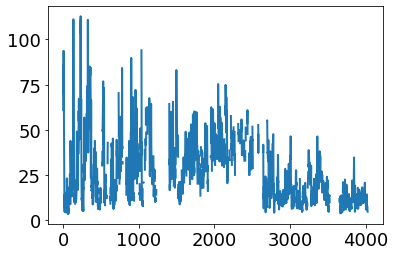

In [ ]:
plt.plot(pm25)

In [ ]:
# pm2.5 si tienes mas del 75% de los datos diarios se saca el promedio
# ozono si tienes mas del 75% de los datos diarios se saca el maximo diario

In [ ]:
for ii in range(pm25_day.shape[0]):
  if (pm25_day[ii, ~pm25_day[ii, :].mask].size) < 18:
    pm25_day[ii, :] = np.ma.masked

In [ ]:
for ii in range(o3_day.shape[0]):
  if (o3_day[ii, ~o3_day[ii, :].mask].size) < 18:
    o3_day[ii, :] = np.ma.masked
    print(ii)

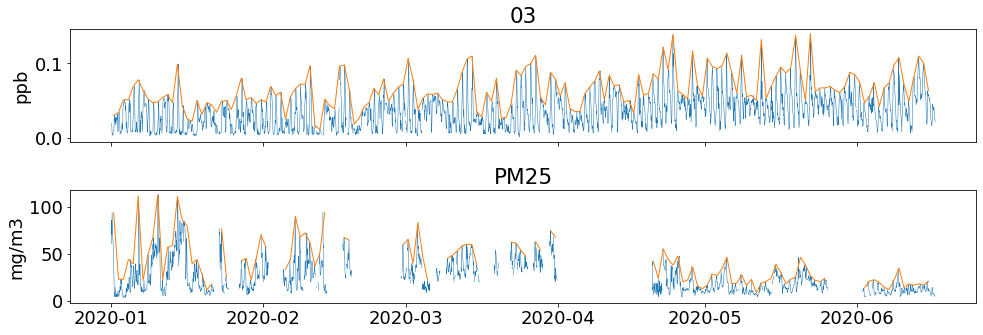

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time), o3, lw=0.5)
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = 'mg/m3'
ax.plot(num2date(time), pm25, lw=0.5)
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 80)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
plt.tight_layout()
# plt.savefig('pollutants_raw.png', bbox_inches='tight')

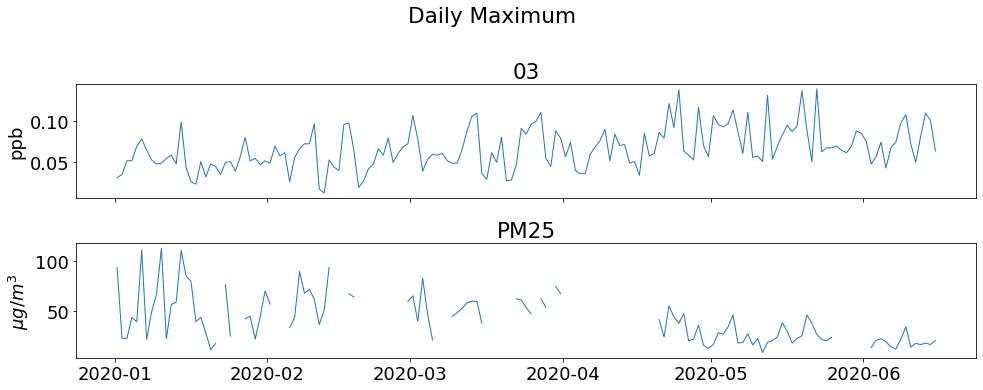

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Maximum', y=1.1)
plt.tight_layout()
plt.savefig('daily_max_pollutants.png', bbox_inches='tight')

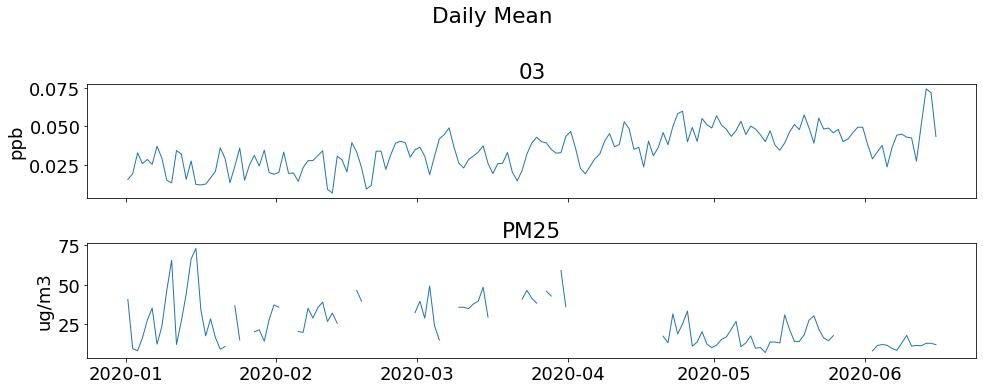

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '03'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = 'PM25'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Mean', y=1.1)
plt.tight_layout()
# plt.savefig('daily_mean_pollutants.png', bbox_inches='tight')

Text(0, 0.5, 'PM2.5 $\\mu g/m^3$')

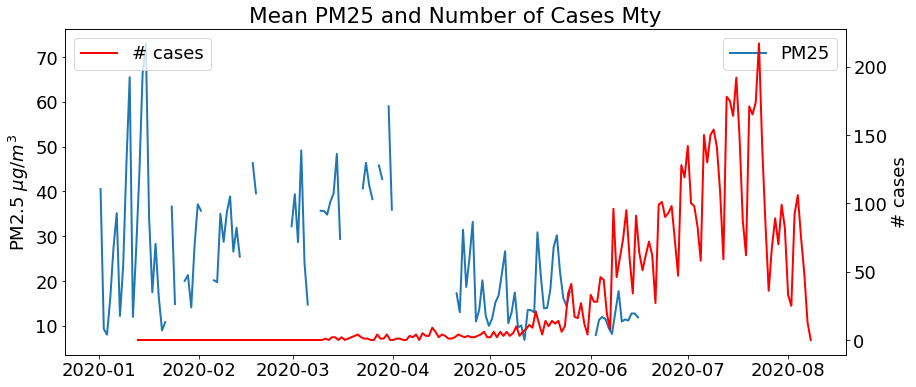

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Mean PM25 and Number of Cases Mty'
ax1 = ax
ax1.plot(num2date(time_day), pm25_day.mean(1), lw=2, label = 'PM25')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=2, color='r', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('# cases')
ax2.legend(loc=2)
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
# ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('PM2.5 $\mu g/m^3$')
# plt.savefig('Figura_Estado_Baja_California.png', bbox_inches='tight')